# Generative_Airfoil

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# !pip install beautifulsoup4 lxml
# !apt-get install -y xfoil  # Install XFOIL for airfoil analysis


In [5]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
import requests
import zipfile
import os
import urllib.request as urllib2
from bs4 import BeautifulSoup
import re

## Dataset

In [6]:
import os

# extract_path = "data"
extract_path = "/kaggle/working/data"


# Ensure the directory exists
os.makedirs(extract_path, exist_ok=True)

In [7]:
!mkdir -p /kaggle/working/data
!cp /kaggle/input/airfoil/data/*.npy /kaggle/working/data
!ls /kaggle/working/data


xs_test.npy  xs_train.npy  ys_test.npy	ys_train.npy


In [8]:
import numpy as np

# data_path = "/content/data"
data_path = "/kaggle/working/data"

xs_train_path = os.path.join(data_path, "xs_train.npy")
ys_train_path = os.path.join(data_path, "ys_train.npy")
xs_test_path  = os.path.join(data_path, "xs_test.npy")
ys_test_path  = os.path.join(data_path, "ys_test.npy")

# Load them
xs_train = np.load(xs_train_path)  # shape: (N_train, 192, 2)
ys_train = np.load(ys_train_path)  # shape: (N_train, 2) => [CL, CD]
xs_test  = np.load(xs_test_path)   # shape: (N_test, 192, 2)
ys_test  = np.load(ys_test_path)   # shape: (N_test, 2) => [CL, CD]

print("Train shapes:", xs_train.shape, ys_train.shape)
print("Test shapes: ", xs_test.shape, ys_test.shape)


Train shapes: (38802, 192, 2) (38802, 2)
Test shapes:  (9701, 192, 2) (9701, 2)


In [9]:
ls

data/


In [10]:
import os
import numpy as np

npy_files = [f for f in os.listdir(data_path) if f.endswith('.npy')]

# Display structure of the numpy arrays
for npy_file in npy_files:
    file_path = os.path.join(data_path, npy_file)
    data = np.load(file_path)

    # Assuming the naming convention includes 'train' or 'test' in the filename
    dataset_type = 'Training' if 'train' in npy_file else 'Testing'

    print(f"\n{npy_file} ({dataset_type} Dataset):")
    print(f"Shape: {data.shape}")
    print(f"Data Type: {data.dtype}")
    print(f"Sample Data (First Row):\n{data[:1]}")



xs_test.npy (Testing Dataset):
Shape: (9701, 192, 2)
Data Type: float64
Sample Data (First Row):
[[[ 9.79070544e-01  5.25827566e-03]
  [ 9.78393137e-01  5.43148629e-03]
  [ 9.76360977e-01  5.95367141e-03]
  [ 9.70665097e-01  7.40007125e-03]
  [ 9.54314291e-01  1.13644814e-02]
  [ 9.49958980e-01  1.23793939e-02]
  [ 9.40773189e-01  1.44706974e-02]
  [ 9.34073627e-01  1.59569308e-02]
  [ 9.25311744e-01  1.78543627e-02]
  [ 9.17369306e-01  1.95318554e-02]
  [ 9.05916393e-01  2.18837615e-02]
  [ 9.01730180e-01  2.27245558e-02]
  [ 8.92270207e-01  2.45886873e-02]
  [ 8.84260476e-01  2.61294600e-02]
  [ 8.69805753e-01  2.88259573e-02]
  [ 8.63483191e-01  2.99723335e-02]
  [ 8.54523599e-01  3.15633528e-02]
  [ 8.44979823e-01  3.32155377e-02]
  [ 8.36374938e-01  3.46680582e-02]
  [ 8.26168537e-01  3.63460667e-02]
  [ 8.16030383e-01  3.79650630e-02]
  [ 8.05350244e-01  3.96194682e-02]
  [ 7.97733545e-01  4.07675169e-02]
  [ 7.87081301e-01  4.23286818e-02]
  [ 7.77254879e-01  4.37229164e-02]
  

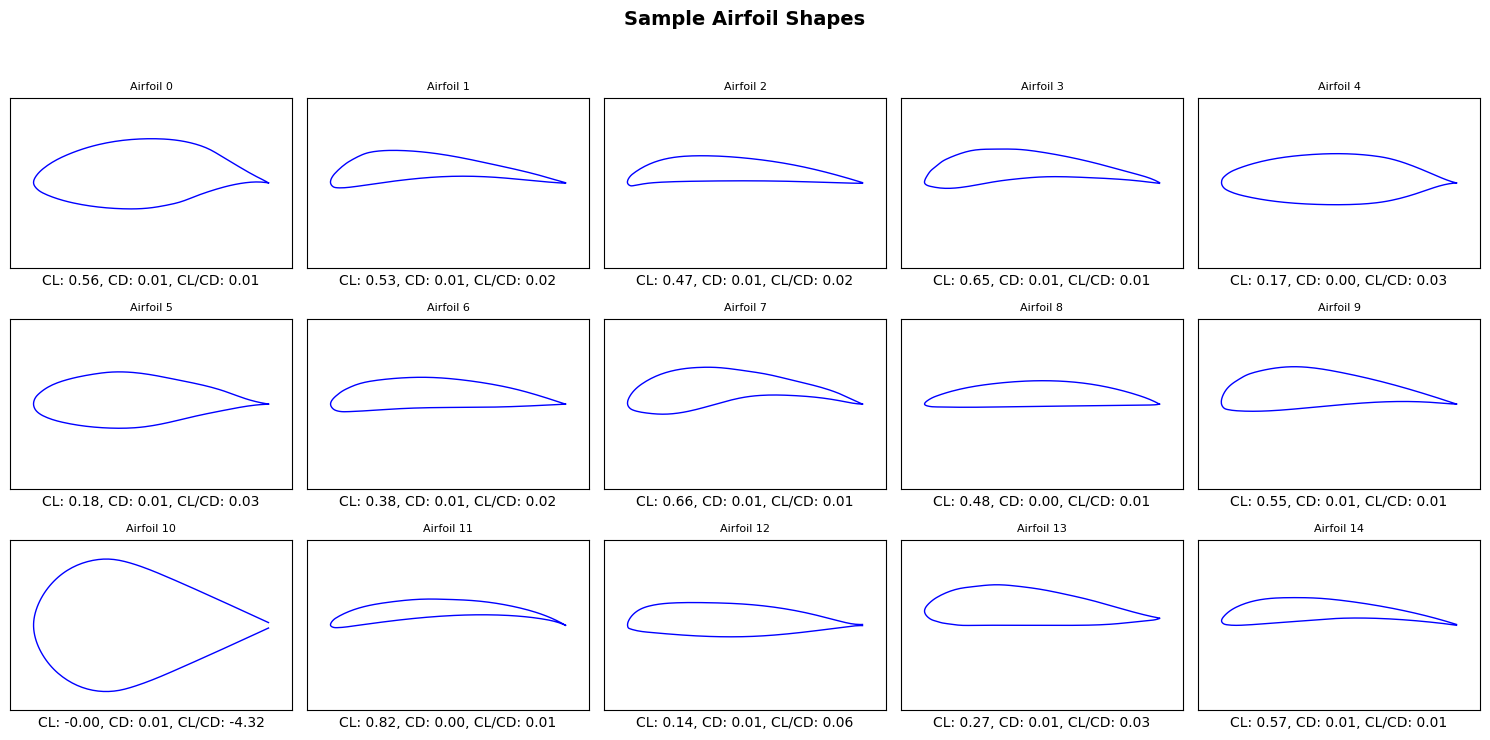

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot airfoils in a grid layout
def plot_airfoils_grid(xs_data, ys_data, num_samples=15, rows=3, cols=5, title="Sample Airfoil Shapes"):
    num_samples = min(num_samples, len(xs_data))  # Ensure we don't exceed available airfoils
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 2.5))  # Adjust size dynamically
    fig.suptitle(title, fontsize=14, fontweight='bold')

    for i, ax in enumerate(axes.flat):  # Loop over subplots
        if i < num_samples:
            x_coords = xs_data[i, :, 0]  # Extract X coordinates
            y_coords = xs_data[i, :, 1]  # Extract Y coordinates
            Cl = ys_data[i, 0]  # Extract CL value
            Cd = ys_data[i, 1]  # Extract CD value
            epsilon = 1e-8
            cl_cd_ratio = Cd / (Cl + epsilon) # Calculate CL/CD ratio
            ax.plot(x_coords, y_coords, color='blue', linewidth=1)
            ax.set_title(f"Airfoil {i}", fontsize=8)
            ax.set_xlabel(f"CL: {Cl:.2f}, CD: {Cd:.2f}, CL/CD: {cl_cd_ratio:.2f}")
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlim(-0.1, 1.1)  # Normalize X range
            ax.set_ylim(-0.25, 0.25)  # Normalize Y range
        else:
            ax.axis('off')  # Hide extra subplots if not needed

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Run the function with 15 airfoil samples
plot_airfoils_grid(xs_train, ys_train, num_samples=15, rows=3, cols=5)


#### transform, scale

In [12]:
# 1. Combine train + test labels for global stats
Y_all = np.concatenate([ys_train, ys_test], axis=0)  # shape: (N_train+N_test, 2)

# 2. Transform (CL, CD) -> (CL, CL/CD)
#    We'll do it in-place on Y_all, then replicate for Y_train, Y_test
eps = 1e-12
Y_all[:, 1] = Y_all[:, 0] / (Y_all[:, 1] + eps)

# 3. min_y and max_y across entire combined set
min_y = np.min(Y_all, axis=0, keepdims=True)  # shape: (1, 2)
max_y = np.max(Y_all, axis=0, keepdims=True)  # shape: (1, 2)

In [13]:
# We also transform Y_train and Y_test in the same way
# But note: we must do the transform step for them as well
ys_train_ratio = ys_train.copy()
ys_test_ratio  = ys_test.copy()

ys_train_ratio[:, 1] = ys_train_ratio[:, 0] / (ys_train_ratio[:, 1] + eps)
ys_test_ratio[:, 1]  = ys_test_ratio[:, 0]  / (ys_test_ratio[:, 1] + eps)

print("Before calling:")
print("Train labels sample:", ys_train_ratio[:5])
print("Test labels sample: ", ys_test_ratio[:5])


# 4. Now min–max scale them using min_y and max_y
ys_train_scaled = (ys_train_ratio - min_y) / (max_y - min_y + eps)
ys_test_scaled  = (ys_test_ratio  - min_y) / (max_y - min_y + eps)

print("After transform+scaling:")
print("Train labels sample:", ys_train_scaled[:5])
print("Test labels sample: ", ys_test_scaled[:5])


Before calling:
Train labels sample: [[ 0.5575     75.23616733]
 [ 0.5335     65.46012269]
 [ 0.4662     61.34210526]
 [ 0.6456     79.21472392]
 [ 0.1748     37.35042734]]
Test labels sample:  [[1.95800000e-01 4.74092010e+01]
 [6.72000000e-02 1.61151079e+01]
 [1.66700000e-01 4.36387434e+01]
 [4.73000000e-01 1.01720430e+02]
 [3.03600000e-01 5.75000000e+01]]
After transform+scaling:
Train labels sample: [[0.41164876 0.46166445]
 [0.39982261 0.42481663]
 [0.3666601  0.40929501]
 [0.45506061 0.47666041]
 [0.22307086 0.31886569]]
Test labels sample:  [[0.23341874 0.35677918]
 [0.17005026 0.23882562]
 [0.21907953 0.34256758]
 [0.37001084 0.56148881]
 [0.28653789 0.39481337]]


In [14]:
scaled_ys_train_path = os.path.join(data_path, "ys_train_scaled.npy")
scaled_ys_test_path  = os.path.join(data_path, "ys_test_scaled.npy")

np.save(scaled_ys_train_path, ys_train_scaled)
np.save(scaled_ys_test_path, ys_test_scaled)

# You might also want to store min_y and max_y for inverse scaling
np.save(os.path.join(data_path, "y_min.npy"), min_y)
np.save(os.path.join(data_path, "y_max.npy"), max_y)


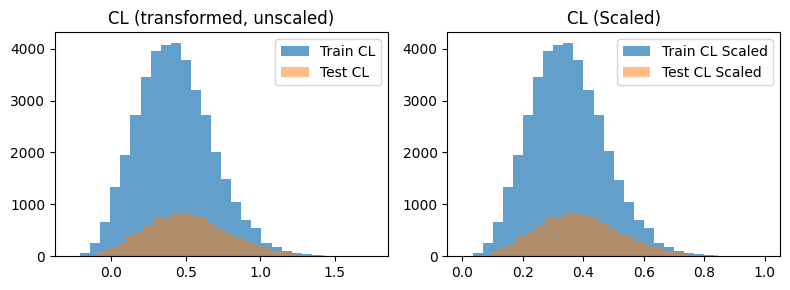

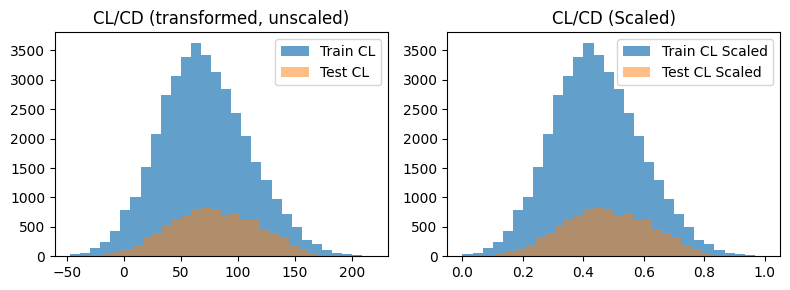

In [15]:
import matplotlib.pyplot as plt

# Plot histogram of CL (first column) before vs after
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(ys_train_ratio[:, 0], bins=30, alpha=0.7, label="Train CL")
ax[0].hist(ys_test_ratio[:, 0], bins=30, alpha=0.5, label="Test CL")
ax[0].set_title("CL (transformed, unscaled)")
ax[0].legend()

ax[1].hist(ys_train_scaled[:, 0], bins=30, alpha=0.7, label="Train CL Scaled")
ax[1].hist(ys_test_scaled[:, 0], bins=30, alpha=0.5, label="Test CL Scaled")
ax[1].set_title("CL (Scaled)")
ax[1].legend()

plt.tight_layout()
plt.show()


# Plot histogram of CL (first column) before vs after
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].hist(ys_train_ratio[:, 1], bins=30, alpha=0.7, label="Train CL")
ax[0].hist(ys_test_ratio[:, 1], bins=30, alpha=0.5, label="Test CL")
ax[0].set_title("CL/CD (transformed, unscaled)")
ax[0].legend()

ax[1].hist(ys_train_scaled[:, 1], bins=30, alpha=0.7, label="Train CL Scaled")
ax[1].hist(ys_test_scaled[:, 1], bins=30, alpha=0.5, label="Test CL Scaled")
ax[1].set_title("CL/CD (Scaled)")
ax[1].legend()

plt.tight_layout()
plt.show()



In [16]:
def analyze_xs_data(xs, name="Data"):
    """
    xs: shape (N, 192, 2)
    name: label for printing
    """
    # Flatten out the X, Y coordinates for global stats
    all_x = xs[..., 0].ravel()
    all_y = xs[..., 1].ravel()

    print(f"\n--- Analysis of {name} ---")
    print(f"Total airfoils: {xs.shape[0]}, each with {xs.shape[1]} points.")
    print(f"X range: min={all_x.min():.4f}, max={all_x.max():.4f}, mean={all_x.mean():.4f}, std={all_x.std():.4f}")
    print(f"Y range: min={all_y.min():.4f}, max={all_y.max():.4f}, mean={all_y.mean():.4f}, std={all_y.std():.4f}")

# Example usage:
analyze_xs_data(xs_train, name="Train X data")
analyze_xs_data(xs_test, name="Test X data")



--- Analysis of Train X data ---
Total airfoils: 38802, each with 192 points.
X range: min=-0.0132, max=1.0002, mean=0.4587, std=0.3040
Y range: min=-0.1944, max=0.2234, mean=0.0219, std=0.0466

--- Analysis of Test X data ---
Total airfoils: 9701, each with 192 points.
X range: min=-0.0120, max=0.9946, mean=0.4657, std=0.3086
Y range: min=-0.1025, max=0.2091, mean=0.0266, std=0.0485


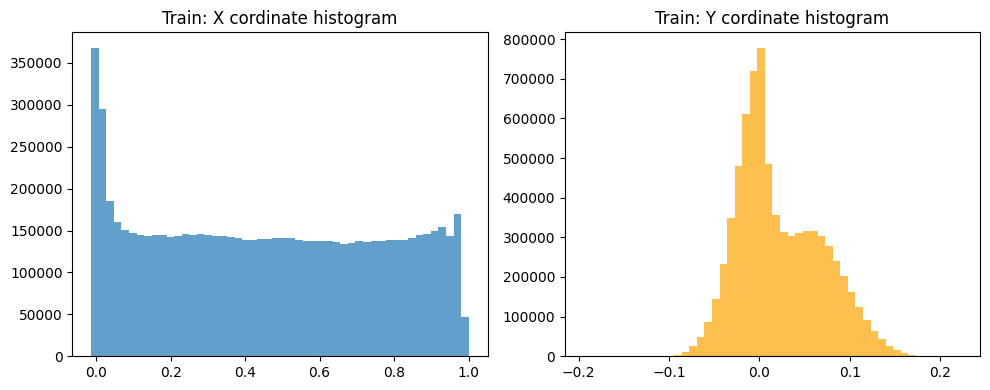

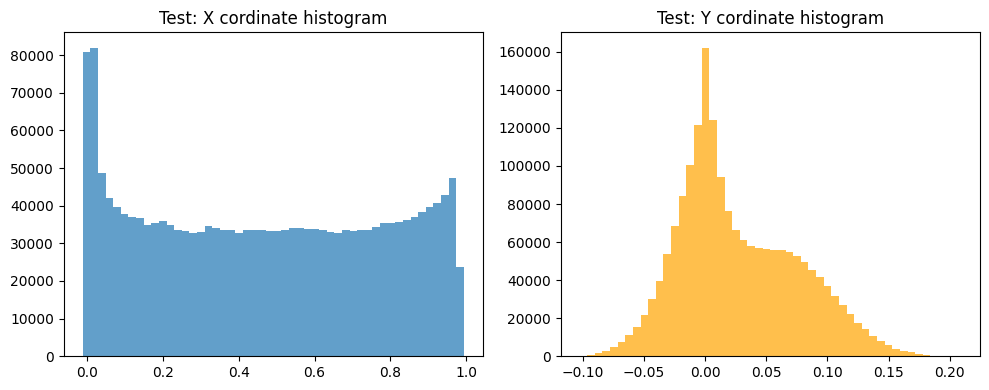

In [17]:
import matplotlib.pyplot as plt

def plot_histograms_for_xs(xs, name="Data"):
    all_x = xs[..., 0].ravel()
    all_y = xs[..., 1].ravel()

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].hist(all_x, bins=50, alpha=0.7)
    ax[0].set_title(f"{name}: X cordinate histogram")
    ax[1].hist(all_y, bins=50, alpha=0.7, color='orange')
    ax[1].set_title(f"{name}: Y cordinate histogram")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_histograms_for_xs(xs_train, "Train")
plot_histograms_for_xs(xs_test, "Test")


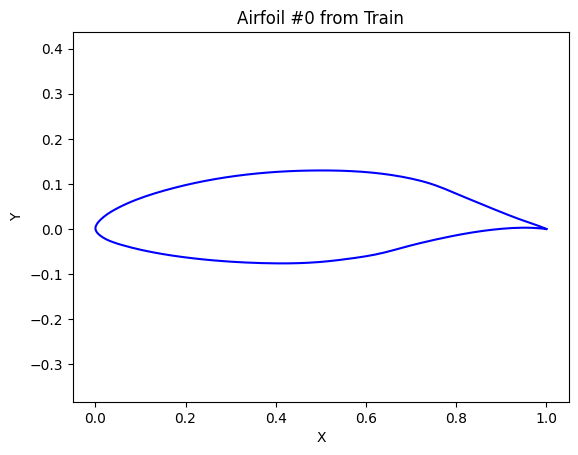

In [18]:
def plot_single_airfoil(coords, title="Airfoil"):
    """
    coords: shape (192, 2)
    """
    x_coords = coords[:, 0]
    y_coords = coords[:, 1]
    plt.figure()
    plt.plot(x_coords, y_coords, 'b-')
    plt.title(title)
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Example usage: look at the 0th sample in xs_train
plot_single_airfoil(xs_train[0], title="Airfoil #0 from Train")


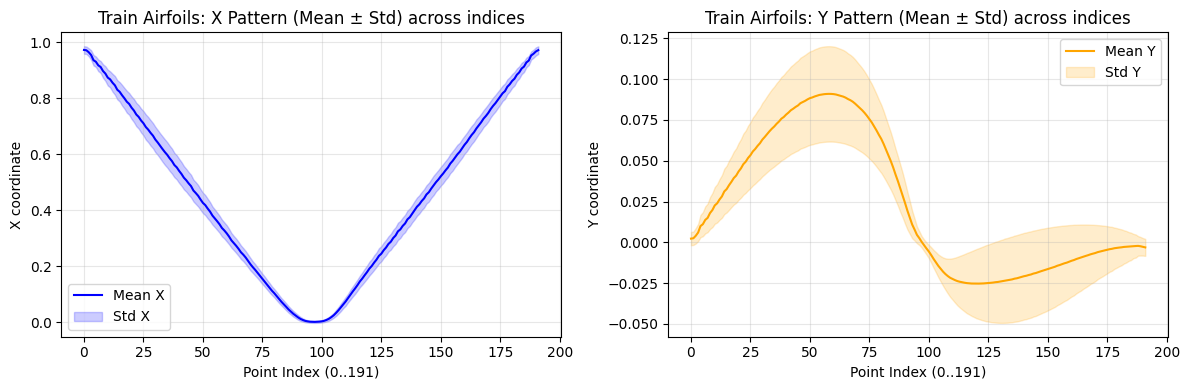

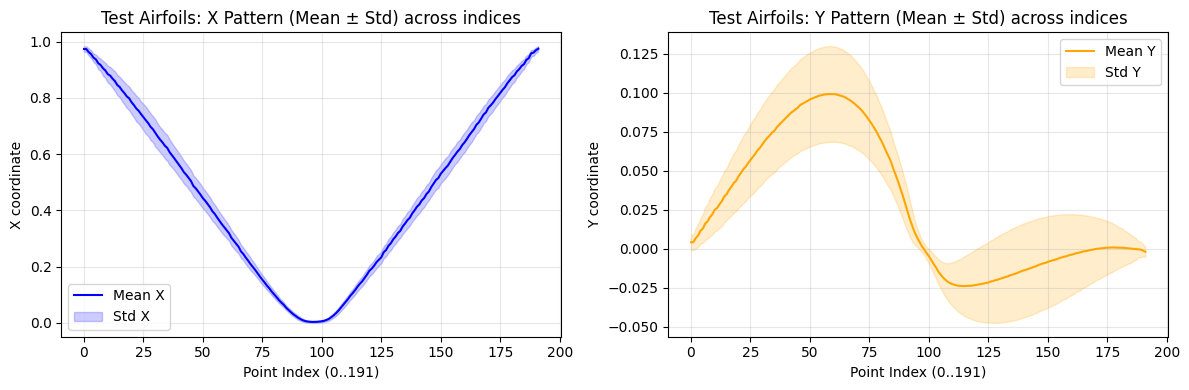

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_pointwise_pattern(xs, name="Data"):
    """
    xs: shape (N, 192, 2)
        Each airfoil is a set of 192 points (x,y).
    name: label for the plots/titles.

    This function computes the mean and standard deviation of x and y at each
    index from 0..191 across the dataset, then plots them.
    """
    # Ensure xs is a numpy array
    xs = np.asarray(xs)
    N, n_points, _ = xs.shape

    # Separate X and Y for all airfoils
    all_x = xs[..., 0]  # shape (N, 192)
    all_y = xs[..., 1]  # shape (N, 192)

    # Compute mean and std across the N airfoils for each index (0..191)
    mean_x = all_x.mean(axis=0)  # shape (192,)
    std_x  = all_x.std(axis=0)
    mean_y = all_y.mean(axis=0)
    std_y  = all_y.std(axis=0)

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # -- Left subplot: X pattern
    ax[0].plot(mean_x, label='Mean X', color='blue')
    ax[0].fill_between(range(n_points), mean_x - std_x, mean_x + std_x,
                       alpha=0.2, color='blue', label='Std X')
    ax[0].set_title(f"{name}: X Pattern (Mean ± Std) across indices")
    ax[0].set_xlabel("Point Index (0..191)")
    ax[0].set_ylabel("X coordinate")
    ax[0].legend()
    ax[0].grid(True, alpha=0.3)

    # -- Right subplot: Y pattern
    ax[1].plot(mean_y, label='Mean Y', color='orange')
    ax[1].fill_between(range(n_points), mean_y - std_y, mean_y + std_y,
                       alpha=0.2, color='orange', label='Std Y')
    ax[1].set_title(f"{name}: Y Pattern (Mean ± Std) across indices")
    ax[1].set_xlabel("Point Index (0..191)")
    ax[1].set_ylabel("Y coordinate")
    ax[1].legend()
    ax[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Example usage:
# Suppose xs_train is shape (N_train, 192, 2)
analyze_pointwise_pattern(xs_train, name="Train Airfoils")
analyze_pointwise_pattern(xs_test,  name="Test Airfoils")


Airfoil 2D Coords shape: torch.Size([128, 2, 192])
lable shape: torch.Size([128, 2])
CL shape: torch.Size([2])
CL_CD_ratio shape: torch.Size([2])


<ipython-input-20-fc78f556d2c3>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor


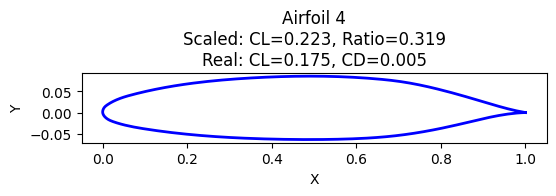

In [20]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class AirfoilDataset(Dataset):
    """
    A PyTorch Dataset that loads pre-processed airfoil coordinates and scaled aerodynamic labels.
    It assumes:
      - xs_path is a .npy file with shape (N, 192, 2) for airfoil coordinates.
      - ys_path is a .npy file with shape (N, 2) containing (CL, CD) values.

    The dataset:
      - Transforms (CL, CD) -> (CL, CL/CD) using a small epsilon.
      - Computes global min and max across train+test (precomputed externally and saved)
        for labels so that they are min–max scaled.
      - Returns each sample with airfoil coordinates transposed to shape (2, n_points),
        and the scaled labels.
      - Provides an inverse_scale_label() method and a plot_sample() method.
    """
    def __init__(self, xs_path, ys_path, y_min_path, y_max_path):
        """
        Args:
          xs_path (str): Path to npy file (shape: (N, 192, 2)) with airfoil coordinates.
          ys_path (str): Path to npy file (shape: (N, 2)) with scaled labels (CL, CL/CD).
          y_min_path (str): Path to npy file containing the min values for labels (shape: (1,2)).
          y_max_path (str): Path to npy file containing the max values for labels (shape: (1,2)).
        """
        self.xs = np.load(xs_path)  # (N, 192, 2)
        self.ys = np.load(ys_path)  # (N, 2), already transformed and scaled
        self.min_y = np.load(y_min_path)  # (1,2)
        self.max_y = np.load(y_max_path)  # (1,2)

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, idx):
        # Load coordinates: shape (192,2)
        coords = self.xs[idx]
        # Transpose to get shape (2, 192): row 0 is x, row 1 is y
        coords = coords.T.astype(np.float32)
        coords_tensor = torch.from_numpy(coords)

        # Get labels (scaled) from the pre-processed file
        cl = self.ys[idx, 0]
        cl_cd_ratio = self.ys[idx, 1]
        label_tensor = torch.tensor([cl, cl_cd_ratio], dtype=torch.float32)

        # return {
        #     'airfoil_2d_coords': coords_tensor,  # shape (2, 192)
        #     'CL': label_tensor[0],
        #     'CL_CD_ratio': label_tensor[1]
        # }
        return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor

    def inverse_scale_label(self, scaled_label):
        """
        Given a label in scaled space (values in [0,1]), invert the min–max scaling.

        Args:
          scaled_label: A NumPy array or tensor of shape (2,) or (batch, 2).

        Returns:
          The denormalized label (CL, CL/CD) as a NumPy array.
        """
        eps = 1e-12
        if isinstance(scaled_label, torch.Tensor):
            scaled_label = scaled_label.cpu().numpy()
        if scaled_label.ndim == 1:
            scaled_label = scaled_label[None, :]
        real_label = scaled_label * (self.max_y - self.min_y + eps) + self.min_y
        return real_label

    def plot_sample(self, idx=None):
        """
        Visualize an airfoil sample.
        - If idx is not provided, a random index is chosen.
        - Plots the airfoil shape (x vs. y) and displays the scaled and real (inverted) label values.
        """
        if idx is None:
            idx = np.random.randint(len(self))
        sample = self.__getitem__(idx)
        # coords_tensor = sample['airfoil_2d_coords']  # shape: (2, n_points)
        # cl_scaled = sample['CL'].item()
        # ratio_scaled = sample['CL_CD_ratio'].item()

        coords_tensor = sample[0]  # shape: (2, n_points)
        cl_scaled = sample[1][0]
        ratio_scaled = sample[1][1]

        # Get inverse-scaled (real) labels
        scaled_label = np.array([cl_scaled, ratio_scaled])
        real_label = self.inverse_scale_label(scaled_label)  # shape: (1, 2)
        real_label = real_label.flatten()  # Now [CL_real, (CL/CD)_real]
        cl_real = real_label[0]
        # Compute CD from the ratio: CD = CL / (CL/CD)
        cd_real = cl_real / (real_label[1] + 1e-12)

        # Plot the airfoil: coords_tensor shape (2, n_points)
        x_coords = coords_tensor[0].numpy()
        y_coords = coords_tensor[1].numpy()

        plt.figure(figsize=(6,4))
        plt.plot(x_coords, y_coords, 'b-', linewidth=2)
        plt.title(f"Airfoil {idx}\nScaled: CL={cl_scaled:.3f}, Ratio={ratio_scaled:.3f}\n"
                  f"Real: CL={cl_real:.3f}, CD={cd_real:.3f}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

# ----------------------------------------
# Usage Example
# ----------------------------------------


xs_train_path = os.path.join(data_path, "xs_train.npy")
ys_train_scaled_path = os.path.join(data_path, "ys_train_scaled.npy")
y_min_path = os.path.join(data_path, "y_min.npy")
y_max_path = os.path.join(data_path, "y_max.npy")

# Instantiate the dataset
dataset = AirfoilDataset(xs_train_path, ys_train_scaled_path, y_min_path, y_max_path)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Print a batch to test shapes
for batch in dataloader:
    # print("Airfoil 2D Coords shape:", batch['airfoil_2d_coords'].shape)  # Expected: (64, 2, 192)
    # print("CL shape:", batch['CL'].shape)         # Expected: (64,)
    # print("CL_CD_ratio shape:", batch['CL_CD_ratio'].shape)  # Expected: (64,)
    print("Airfoil 2D Coords shape:", batch[0].shape)  # Expected: (64, 2, 192)
    print("lable shape:", batch[1].shape)  # Expected: (64, 2, 192)
    print("CL shape:", batch[1][:][0].shape)         # Expected: (64,)
    print("CL_CD_ratio shape:", batch[1][:][1].shape)  # Expected: (64,)
    break

# Plot a random sample from the dataset
dataset.plot_sample(4)  # or dataset.plot_sample(idx=0)


## Surrogate Model

In [21]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [31]:
class ResidualBlock1D(nn.Module):
    """
    A 1D residual block with optional downsampling.
    The first conv can do stride=2 if downsample=True, the second conv uses stride=1.
    We'll use kernel=5, pad=2 so that stride=1 doesn't reduce length at all.
    """
    def __init__(self, in_channels, out_channels, downsample=False):
        super().__init__()
        self.downsample = downsample

        # If we want to downsample, we set stride=2 for the first conv and the shortcut
        stride_first = 2 if downsample else 1
        kernel_size = 5
        pad = 2

        # 1) First conv
        self.bn1 = nn.BatchNorm1d(in_channels, momentum=0.9)
        self.conv1 = nn.Conv1d(in_channels, out_channels,
                               kernel_size=kernel_size,
                               stride=stride_first,
                               padding=pad)
        # 2) Second conv always stride=1
        self.bn2 = nn.BatchNorm1d(out_channels, momentum=0.9)
        self.conv2 = nn.Conv1d(out_channels, out_channels,
                               kernel_size=kernel_size,
                               stride=1,
                               padding=pad)

        # Shortcut (for downsample or channel mismatch)
        if downsample or (in_channels != out_channels):
            self.shortcut_conv = nn.Conv1d(in_channels, out_channels,
                                           kernel_size=1,
                                           stride=stride_first,
                                           padding=0)
        else:
            self.shortcut_conv = nn.Identity()

        self.lrelu = nn.LeakyReLU(0.2, inplace=True)

    def forward(self, x, debug=False):
        if debug:
            print(f"  [ResidualBlock] Input shape: {x.shape}")
        identity = self.shortcut_conv(x)     # Possibly stride=2 if downsample is True

        # First conv
        out = self.bn1(x)
        out = self.lrelu(out)
        out = self.conv1(out)
        if debug:
            print(f"    After conv1 shape: {out.shape}")

        # Second conv
        out = self.bn2(out)
        out = self.lrelu(out)
        out = self.conv2(out)
        if debug:
            print(f"    After conv2 shape: {out.shape}")

        # Add skip
        out = out + identity
        if debug:
            print(f"  [ResidualBlock] Output shape: {out.shape}\n")

        return out




class SurrogateModel1D(nn.Module):
    """
    A 1D ResNet-like approach for (batch, 2, n_points).
    We'll do four "groups" of blocks, each of which can downsample the length dimension in the first block.
    """
    def __init__(self, n_points=192, in_channels=2, depth=16, residual_list=[2,2,2,2]):
        super().__init__()
        self.depth = depth
        self.residual_list = residual_list

        # -- Initial Conv: kernel=5, pad=2, stride=1 => length stays 192
        self.conv_initial = nn.Conv1d(in_channels, depth, kernel_size=5, stride=1, padding=2)
        self.bn_initial = nn.BatchNorm1d(depth, momentum=0.9)
        self.lrelu = nn.LeakyReLU(0.2, inplace=True)

        # Group0: no downsample in first block
        self.blocks0 = nn.ModuleList([
            ResidualBlock1D(depth, depth, downsample=False)
            for _ in range(residual_list[0])
        ])
        # Group1: first block downsample => depth-> depth*2
        self.resblock1_0 = ResidualBlock1D(depth, depth*2, downsample=True)
        self.blocks1 = nn.ModuleList([
            ResidualBlock1D(depth*2, depth*2, downsample=False)
            for _ in range(residual_list[1]-1)
        ])
        # Group2
        self.resblock2_0 = ResidualBlock1D(depth*2, depth*4, downsample=True)
        self.blocks2 = nn.ModuleList([
            ResidualBlock1D(depth*4, depth*4, downsample=False)
            for _ in range(residual_list[2]-1)
        ])
        # Group3
        self.resblock3_0 = ResidualBlock1D(depth*4, depth*8, downsample=True)
        self.blocks3 = nn.ModuleList([
            ResidualBlock1D(depth*8, depth*8, downsample=False)
            for _ in range(residual_list[3]-1)
        ])

        # Final BN + global avg pool + FC(128) + BN + LReLU + FC(2) + Sigmoid
        self.bn_final = nn.BatchNorm1d(depth*8, momentum=0.9)
        self.fc1 = nn.Linear(depth*8, 128)
        self.bn_fc1 = nn.BatchNorm1d(128, momentum=0.9)
        self.fc2 = nn.Linear(128, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, debug=False):
        if debug:
            print(f"Input shape: {x.shape}")
        out = self.conv_initial(x)
        out = self.bn_initial(out)
        out = self.lrelu(out)
        if debug:
            print(f"After initial conv shape: {out.shape}")

        # group0
        for block in self.blocks0:
            out = block(out, debug=debug)
        if debug:
            print(f"After group0 shape: {out.shape}")

        # group1
        out = self.resblock1_0(out, debug=debug)
        for block in self.blocks1:
            out = block(out, debug=debug)
        if debug:
            print(f"After group1 shape: {out.shape}")

        # group2
        out = self.resblock2_0(out, debug=debug)
        for block in self.blocks2:
            out = block(out, debug=debug)
        if debug:
            print(f"After group2 shape: {out.shape}")

        # group3
        out = self.resblock3_0(out, debug=debug)
        for block in self.blocks3:
            out = block(out, debug=debug)
        if debug:
            print(f"After group3 shape: {out.shape}")

        out = self.bn_final(out)
        out = self.lrelu(out)
        if debug:
            print(f"After bn_final + lrelu shape: {out.shape}")

        # global avg pool => (batch, depth*8, 1)
        out = F.adaptive_avg_pool1d(out, 1)
        if debug:
            print(f"After global avg pool shape: {out.shape}")
        out = out.view(out.size(0), -1)  # => (batch, depth*8)

        out = self.fc1(out)
        out = self.bn_fc1(out)
        out = self.lrelu(out)
        if debug:
            print(f"After fc1 shape: {out.shape}")

        out = self.fc2(out)
        out = self.sigmoid(out)
        if debug:
            print(f"Output shape: {out.shape}")

        return out


In [32]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def sum_mse(yhat, y):
    """
    Compute the mean squared error per sample (averaged over the output dims)
    and then sum these sample losses over the batch.
    """
    # First, compute the MSE for each sample (averaging over regression targets)
    per_sample_mse = torch.mean((yhat - y) ** 2, dim=1)
    # Then, sum these values over the batch
    return torch.sum(per_sample_mse)


def print_model_info(model, input_shape=(2, 2, 192)):
    print("Model Architecture:")
    print(model)
    total_params = count_parameters(model)
    print(f"Total trainable parameters: {total_params:,}\n")

    dummy_input = torch.randn(*input_shape)
    print("Running dummy forward pass with debug=True (training mode):")
    _ = model(dummy_input, debug=True)
    print("Dummy forward pass complete.\n")

# -----------------------------
# Training Loop with History, Checkpoint Saving, Best Model, and Early Stopping
# -----------------------------
def train_surrogate_model(
    model,
    train_loader,
    test_loader,
    num_epochs=100,
    lr=0.0005,
    device='cuda',
    debug=False,
    checkpoint_dir="/content/drive/MyDrive/AI/Airfoil_diffusion/surrogate_model/residulV0",
    patience=50  # Early stopping patience: stop if no improvement for 'patience' epochs.
):
    os.makedirs(checkpoint_dir, exist_ok=True)
    model = model.to(device)
    # criterion = nn.L1Loss()
    # criterion = nn.MSELoss()
    ###
    # Use our custom summed MSE loss for training
    criterion = sum_mse
    # You may choose to use the standard MSELoss for validation to compare means
    criterion_val = nn.MSELoss()
    ###
    optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.5, 0.999))

    train_losses = []
    test_losses = []
    best_loss = float('inf')
    best_epoch = 0
    epochs_without_improvement = 0
    start_time = time.time()

    for epoch in range(1, num_epochs+1):
        model.train()
        running_loss = 0.0
        for batch_idx, batch in enumerate(train_loader):
            coords = batch[0].to(device)   # shape: (batch, 2, n_points)
            labels = batch[1].to(device)   # shape: (batch, 2)

            if batch_idx == 0 and debug:
                print(f"\n--- Epoch {epoch}, Batch {batch_idx} ---")
                print("Input coords shape:", coords.shape)
                print("Labels shape:", labels.shape)

            optimizer.zero_grad()
            outputs = model(coords, debug=(batch_idx == 0 and debug))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * coords.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Evaluate on test set using the standard (averaged) MSELoss for reference
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for batch in test_loader:
                coords = batch[0].to(device)
                labels = batch[1].to(device)
                preds = model(coords)
                # test_loss += criterion(preds, labels).item() * coords.size(0)
                test_loss += criterion_val(preds, labels).item() * coords.size(0)

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {epoch_loss:.6f}, Test Loss: {test_loss:.6f}")

        if epoch % (num_epochs // 5) == 0:
            # Save a checkpoint for this epoch
            epoch_checkpoint = os.path.join(checkpoint_dir, f"model_epoch_{epoch}.pt")
            torch.save(model.state_dict(), epoch_checkpoint)
            print(f"Checkpoint saved at: {epoch_checkpoint}")

        # Best model saving and early stopping check
        if test_loss < best_loss:
            best_loss = test_loss
            best_epoch = epoch
            epochs_without_improvement = 0
            best_model_path = os.path.join(checkpoint_dir, "best_model.pt")
            torch.save(model.state_dict(), best_model_path)
            print(f"New best model saved at epoch {epoch} with test loss {test_loss:.6f}")
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"No improvement for {patience} epochs. Early stopping at epoch {epoch}.")
            break

    elapsed = time.time() - start_time
    print(f"\nTraining completed in {elapsed:.2f} seconds. Best epoch: {best_epoch} with test loss: {best_loss:.6f}")

    # Plot loss history
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Loss")
    plt.plot(range(1, len(test_losses)+1), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss ")
    plt.title("Training and Test Loss History")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Save loss history to disk
    np.save(os.path.join(checkpoint_dir, "train_losses.npy"), np.array(train_losses))
    np.save(os.path.join(checkpoint_dir, "test_losses.npy"), np.array(test_losses))


In [33]:
data_path = "/kaggle/working/data"
xs_train_path = os.path.join(data_path, "xs_train.npy")
ys_train_scaled_path = os.path.join(data_path, "ys_train_scaled.npy")
ys_test_scaled_path = os.path.join(data_path, "ys_test_scaled.npy")
y_min_path = os.path.join(data_path, "y_min.npy")
y_max_path = os.path.join(data_path, "y_max.npy")

# Instantiate your dataset.
# (Assume your AirfoilDataset is defined as in your provided code that returns a dict with keys:
#  'airfoil_2d_coords', 'CL', 'CL_CD_ratio'.)
from torch.utils.data import DataLoader
train_dataset = AirfoilDataset(xs_train_path, ys_train_scaled_path, y_min_path, y_max_path)
test_dataset = AirfoilDataset(xs_train_path, ys_train_scaled_path, y_min_path, y_max_path)  # Use your test set accordingly

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SurrogateModel1D(n_points=192, in_channels=2, depth=16, residual_list=[2,2,2,2])

# Print model information before training
print_model_info(model, input_shape=(2, 2, 192))


Model Architecture:
SurrogateModel1D(
  (conv_initial): Conv1d(2, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn_initial): BatchNorm1d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
  (blocks0): ModuleList(
    (0-1): 2 x ResidualBlock1D(
      (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (conv1): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (conv2): Conv1d(16, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (shortcut_conv): Identity()
      (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    )
  )
  (resblock1_0): ResidualBlock1D(
    (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv1): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (bn2): BatchNorm1d(32, eps=1e-05, mo

In [30]:
train_surrogate_model(
    model,
    train_loader,
    test_loader,
    num_epochs=250,
    lr=0.0005,
    device=device,
    debug=False,
    # checkpoint_dir="/content/drive/MyDrive/AI/Airfoil_diffusion/surrogate_model/residulV0",
    checkpoint_dir="/kaggle/working/surrogate_model/residulV0",
    patience=100
)

<ipython-input-20-fc78f556d2c3>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor


Epoch [1/250] - Train Loss: 0.002853, Test Loss: 0.001445
New best model saved at epoch 1 with test loss 0.001445
Epoch [2/250] - Train Loss: 0.000807, Test Loss: 0.037138
Epoch [3/250] - Train Loss: 0.000691, Test Loss: 0.002640
Epoch [4/250] - Train Loss: 0.000569, Test Loss: 0.001235
New best model saved at epoch 4 with test loss 0.001235
Epoch [5/250] - Train Loss: 0.000551, Test Loss: 0.005327
Epoch [6/250] - Train Loss: 0.000526, Test Loss: 0.014289
Epoch [7/250] - Train Loss: 0.000493, Test Loss: 0.007623
Epoch [8/250] - Train Loss: 0.000484, Test Loss: 0.005448
Epoch [9/250] - Train Loss: 0.000475, Test Loss: 0.002062
Epoch [10/250] - Train Loss: 0.000456, Test Loss: 0.003440
Epoch [11/250] - Train Loss: 0.000473, Test Loss: 0.047131
Epoch [12/250] - Train Loss: 0.000437, Test Loss: 0.000355
New best model saved at epoch 12 with test loss 0.000355
Epoch [13/250] - Train Loss: 0.000411, Test Loss: 0.014662
Epoch [14/250] - Train Loss: 0.000441, Test Loss: 0.002888
Epoch [15/250]

KeyboardInterrupt: 

<ipython-input-20-fc78f556d2c3>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor


Epoch [1/250] - Train Loss: 0.263520, Test Loss: 0.003478
New best model saved at epoch 1 with test loss 0.003478
Epoch [2/250] - Train Loss: 0.093330, Test Loss: 0.001287
New best model saved at epoch 2 with test loss 0.001287
Epoch [3/250] - Train Loss: 0.080841, Test Loss: 0.001038
New best model saved at epoch 3 with test loss 0.001038
Epoch [4/250] - Train Loss: 0.071286, Test Loss: 0.011027
Epoch [5/250] - Train Loss: 0.067830, Test Loss: 0.002655
Epoch [6/250] - Train Loss: 0.062814, Test Loss: 0.001505
Epoch [7/250] - Train Loss: 0.061301, Test Loss: 0.010363
Epoch [8/250] - Train Loss: 0.060244, Test Loss: 0.007400
Epoch [9/250] - Train Loss: 0.053855, Test Loss: 0.003879
Epoch [10/250] - Train Loss: 0.054132, Test Loss: 0.001276
Epoch [11/250] - Train Loss: 0.055612, Test Loss: 0.000405
New best model saved at epoch 11 with test loss 0.000405
Epoch [12/250] - Train Loss: 0.056022, Test Loss: 0.000331
New best model saved at epoch 12 with test loss 0.000331
Epoch [13/250] - Tr

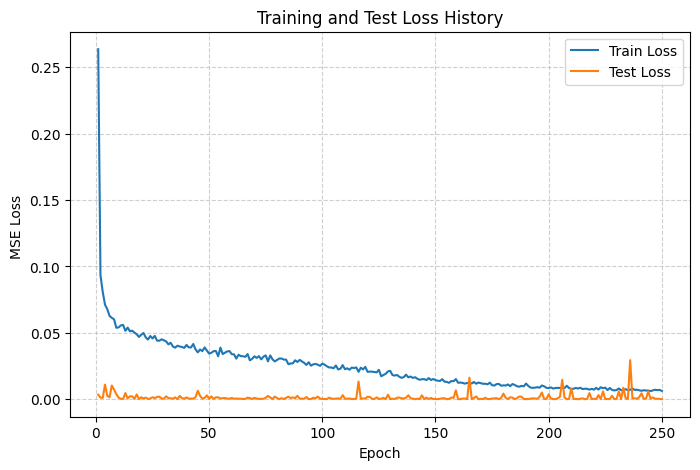

In [34]:
train_surrogate_model(
    model,
    train_loader,
    test_loader,
    num_epochs=250,
    lr=0.0005,
    device=device,
    debug=False,
    # checkpoint_dir="/content/drive/MyDrive/AI/Airfoil_diffusion/surrogate_model/residulV0",
    checkpoint_dir="/kaggle/working/surrogate_model/residulV0",
    patience=100
)

Visualizing predictions on TRAIN set samples:


<ipython-input-20-fc78f556d2c3>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor


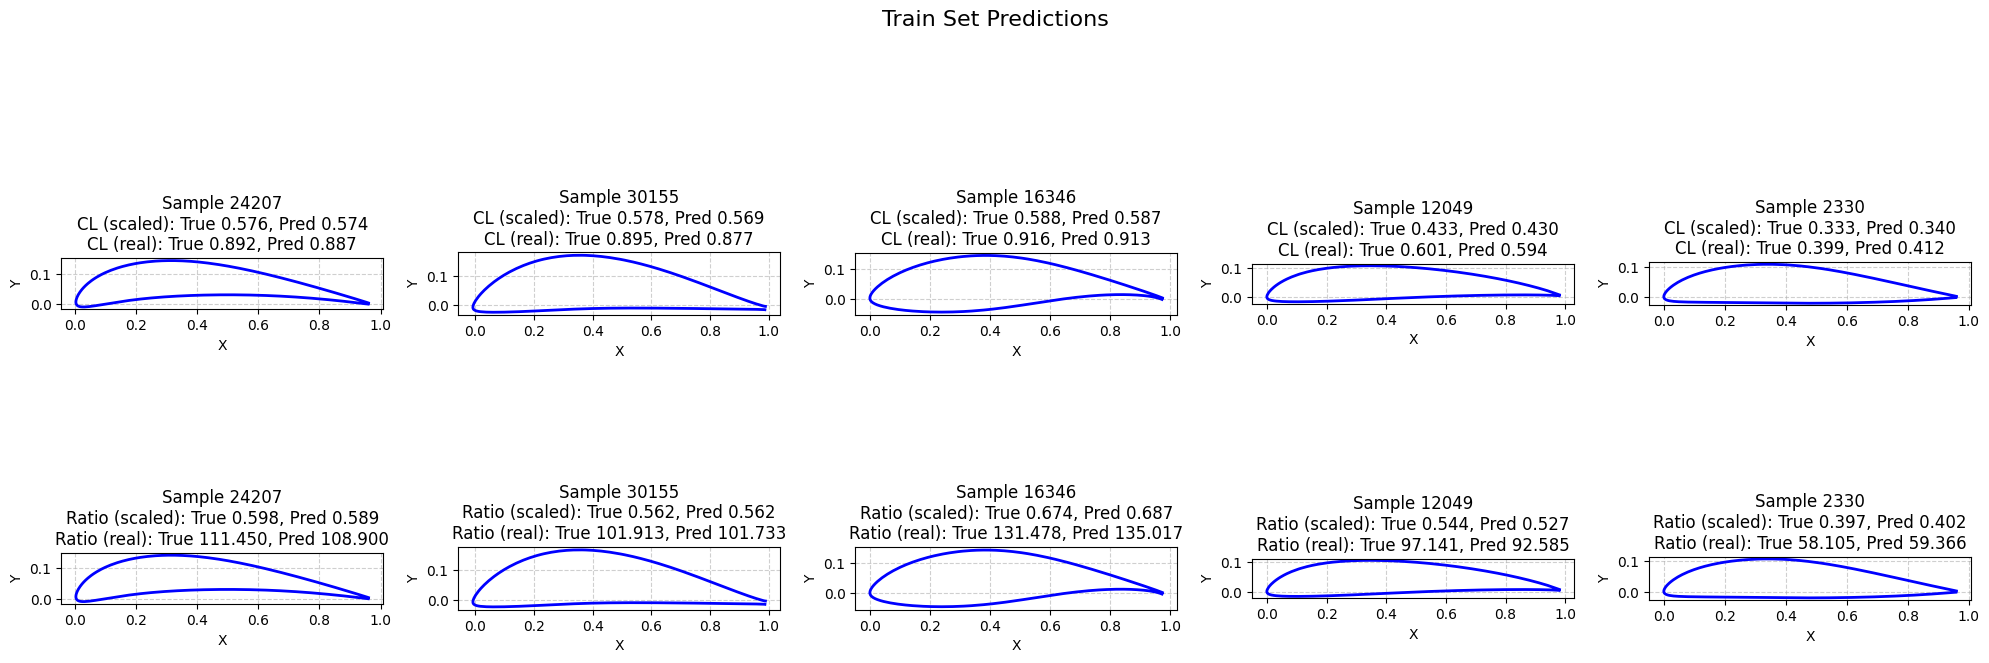

Visualizing predictions on TEST set samples:


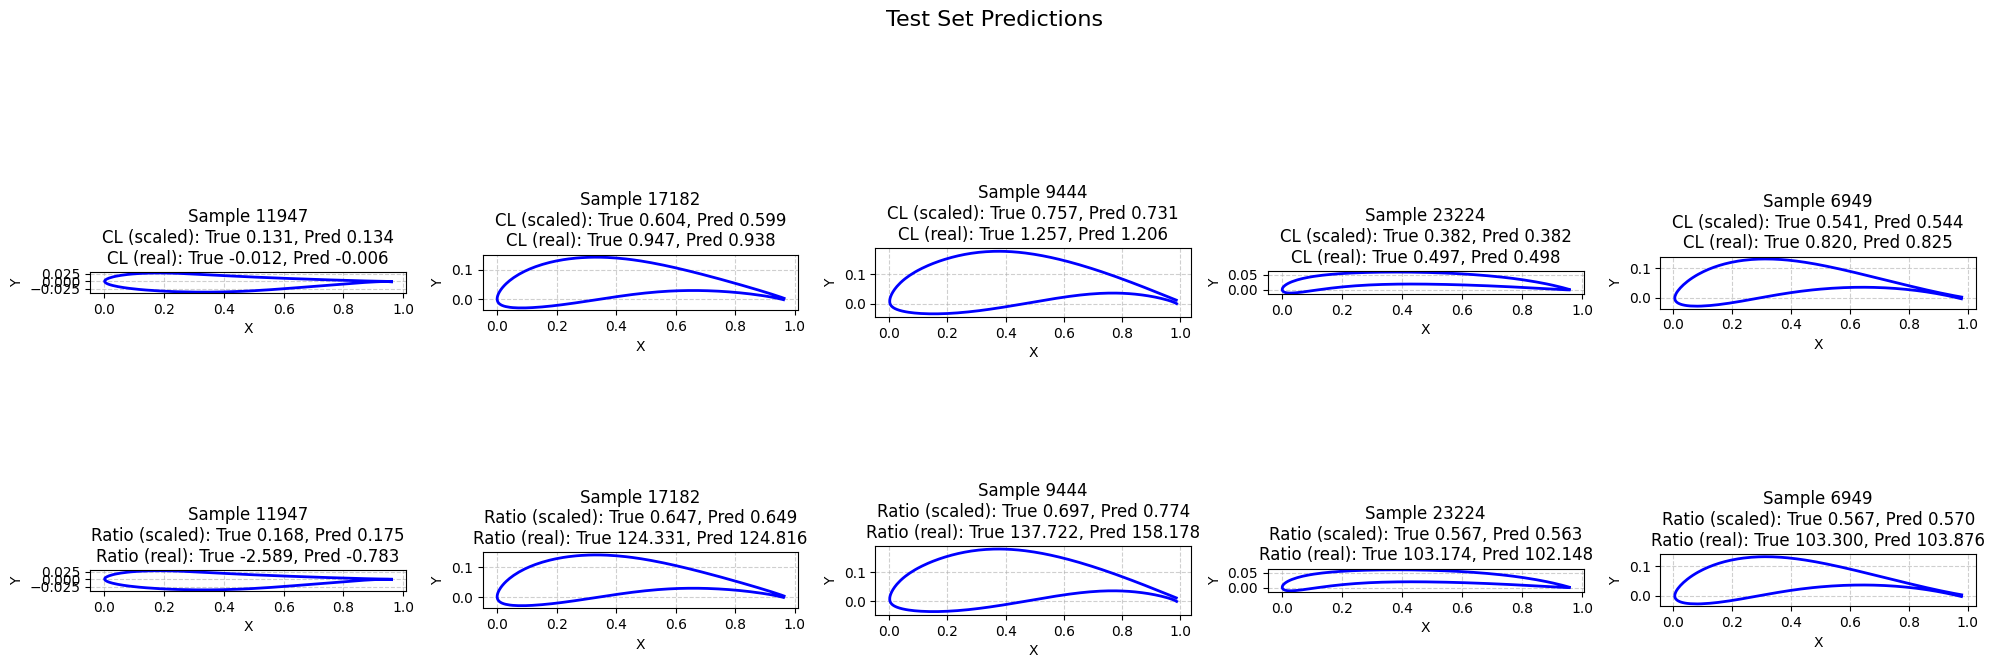

In [35]:
def visualize_predictions_grid(model, dataset, device, sample_indices=None, set_name="Train", figsize=(20,8)):
    """
    Visualizes a grid of predictions for a set of airfoil samples.

    For each selected sample, the function plots the airfoil shape twice:
      - Top row: Annotated with the true and predicted CL values (both scaled and inverse-scaled).
      - Bottom row: Annotated with the true and predicted CL/CD ratio values (both scaled and inverse-scaled).

    Args:
      model: The trained PyTorch model.
      dataset: An instance of your AirfoilDataset.
      device: 'cuda' or 'cpu'.
      sample_indices: List or array of sample indices to visualize. If None, 5 random indices are chosen.
      set_name: String label for the dataset (e.g. "Train" or "Test").
      figsize: Tuple for figure size.
    """
    model.eval()
    if sample_indices is None:
        num_samples = 5
        sample_indices = np.random.choice(len(dataset), size=num_samples, replace=False)
    else:
        num_samples = len(sample_indices)

    # Create a grid with 2 rows and num_samples columns
    fig, axs = plt.subplots(2, num_samples, figsize=figsize)

    for j, idx in enumerate(sample_indices):
        # Get a sample from the dataset: coords (tensor of shape (2, n_points)) and scaled label (tensor of shape (2,))
        coords, label = dataset[idx]
        # Ensure coords and label are on CPU and in NumPy format
        coords_np = coords.cpu().numpy()  # shape: (2, n_points)

        # Run a forward pass on the sample
        coords_batch = coords.unsqueeze(0).to(device)  # add batch dimension: (1, 2, n_points)
        with torch.no_grad():
            pred = model(coords_batch)
        pred = pred.squeeze(0).cpu()  # shape: (2,)

        # Inverse scale both prediction and true label
        true_unscaled = dataset.inverse_scale_label(label.numpy()).flatten()  # shape: (2,)
        pred_unscaled = dataset.inverse_scale_label(pred.numpy()).flatten()   # shape: (2,)

        # Extract values:
        # For CL: element 0; for ratio: element 1.
        true_CL_scaled = label[0].item()
        pred_CL_scaled = pred[0].item()
        true_ratio_scaled = label[1].item()
        pred_ratio_scaled = pred[1].item()

        true_CL_real = true_unscaled[0]
        pred_CL_real = pred_unscaled[0]
        true_ratio_real = true_unscaled[1]
        pred_ratio_real = pred_unscaled[1]

        # --- Top row: CL information ---
        axs[0, j].plot(coords_np[0], coords_np[1], 'b-', linewidth=2)
        axs[0, j].set_title(
            f"Sample {idx}\n"
            f"CL (scaled): True {true_CL_scaled:.3f}, Pred {pred_CL_scaled:.3f}\n"
            f"CL (real): True {true_CL_real:.3f}, Pred {pred_CL_real:.3f}"
        )
        axs[0, j].set_xlabel("X")
        axs[0, j].set_ylabel("Y")
        axs[0, j].set_aspect('equal', adjustable='box')
        axs[0, j].grid(True, linestyle="--", alpha=0.6)

        # --- Bottom row: CL/CD ratio information ---
        axs[1, j].plot(coords_np[0], coords_np[1], 'b-', linewidth=2)
        axs[1, j].set_title(
            f"Sample {idx}\n"
            f"Ratio (scaled): True {true_ratio_scaled:.3f}, Pred {pred_ratio_scaled:.3f}\n"
            f"Ratio (real): True {true_ratio_real:.3f}, Pred {pred_ratio_real:.3f}"
        )
        axs[1, j].set_xlabel("X")
        axs[1, j].set_ylabel("Y")
        axs[1, j].set_aspect('equal', adjustable='box')
        axs[1, j].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle(f"{set_name} Set Predictions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# For training set visualization:
print("Visualizing predictions on TRAIN set samples:")
visualize_predictions_grid(model, train_dataset, device, set_name="Train")

# For test set visualization:
print("Visualizing predictions on TEST set samples:")
visualize_predictions_grid(model, test_dataset, device, set_name="Test")


Plotting a smaller subset (100 samples) for the TRAIN set:


<ipython-input-20-fc78f556d2c3>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(coords_tensor, dtype=torch.float32), label_tensor


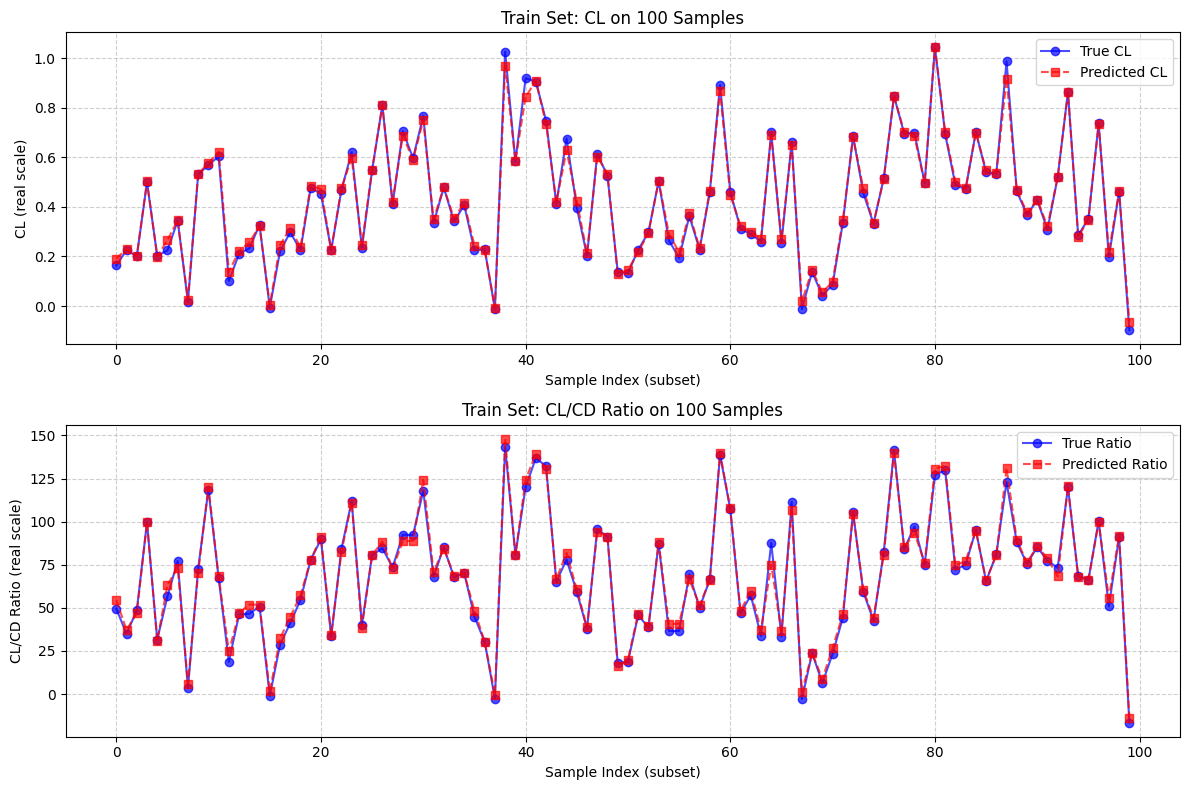

Plotting a smaller subset (100 samples) for the TEST set:


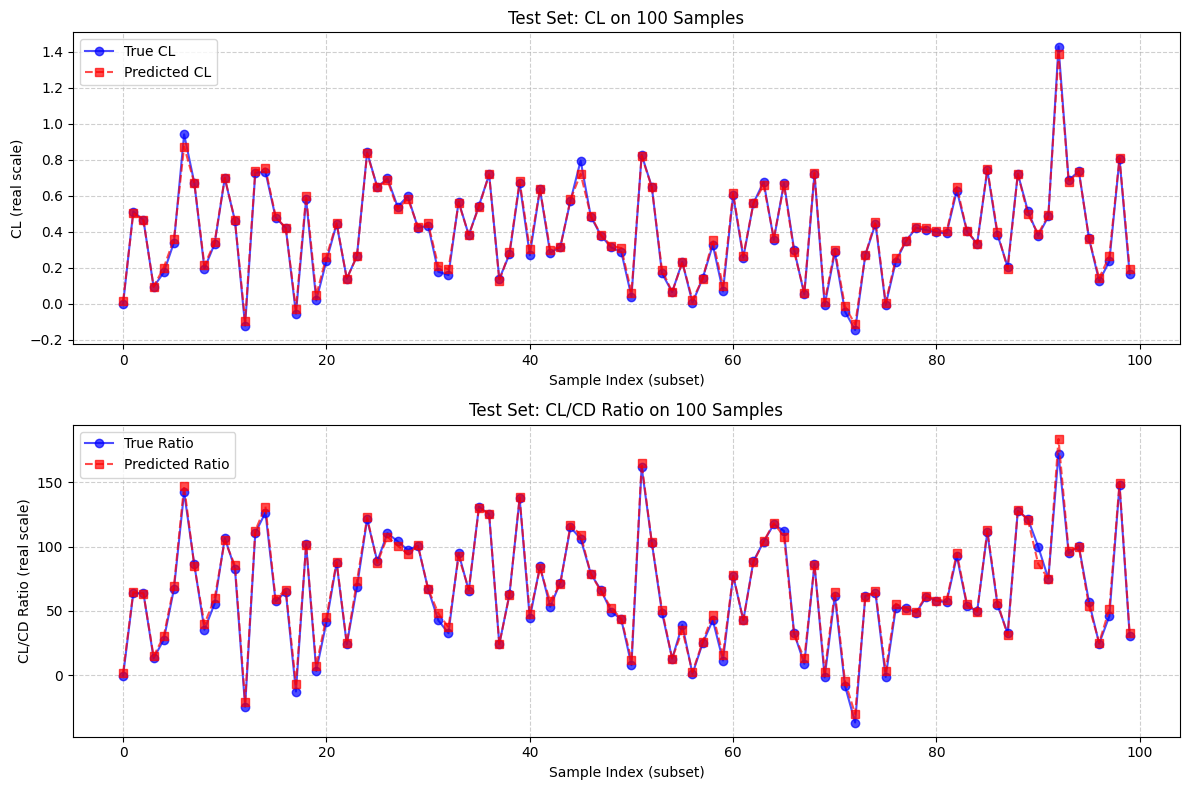

In [36]:
def plot_small_subset_predictions(model, dataset, device, sample_count=100, set_name="Train"):
    """
    Plots a smaller subset of samples (default=100) to compare predicted vs. true labels (CL and CL/CD).
    We do a line plot with 2 subplots:
      - Top subplot: CL (real) vs. predicted
      - Bottom subplot: Ratio (real) vs. predicted

    Args:
      model: Trained PyTorch model
      dataset: Instance of your AirfoilDataset
      device: 'cuda' or 'cpu'
      sample_count: Number of samples to plot
      set_name: String for labeling (e.g., "Train" or "Test")
    """
    model.eval()

    # Pick a random subset of sample_count indices from the dataset
    indices = np.random.choice(len(dataset), size=sample_count, replace=False)
    indices = sorted(indices)  # Sort so that the lines look smoother in the plot

    # We'll store real CL/CD and predicted CL/CD in arrays for plotting
    real_CL_vals = []
    real_ratio_vals = []
    pred_CL_vals = []
    pred_ratio_vals = []

    # No batch dimension here, we'll just do them one by one (100 is small enough)
    with torch.no_grad():
        for idx in indices:
            coords, scaled_label = dataset[idx]

            # coords shape: (2, n_points)
            # scaled_label shape: (2,) => [CL_scaled, ratio_scaled]
            # Move coords to device
            coords_batch = coords.unsqueeze(0).to(device)  # shape: (1, 2, n_points)

            # Model prediction
            pred_scaled = model(coords_batch)  # shape: (1, 2)
            pred_scaled = pred_scaled.squeeze(0).cpu().numpy()  # shape: (2,)

            # Inverse-scale both the ground-truth and the prediction
            true_unscaled = dataset.inverse_scale_label(scaled_label.numpy()).flatten()  # shape: (2,)
            pred_unscaled = dataset.inverse_scale_label(pred_scaled).flatten()           # shape: (2,)

            # Extract CL and ratio
            real_CL_vals.append(true_unscaled[0])
            real_ratio_vals.append(true_unscaled[1])
            pred_CL_vals.append(pred_unscaled[0])
            pred_ratio_vals.append(pred_unscaled[1])

    # Now we have arrays of length = sample_count for real/pred CL and ratio
    x_axis = range(sample_count)  # Just 0..(sample_count-1)

    plt.figure(figsize=(12, 8))

    # --- Top subplot: CL ---
    plt.subplot(2, 1, 1)
    plt.plot(x_axis, real_CL_vals, 'o-', label="True CL", color='blue', alpha=0.7)
    plt.plot(x_axis, pred_CL_vals, 's--', label="Predicted CL", color='red', alpha=0.7)
    plt.title(f"{set_name} Set: CL on {sample_count} Samples")
    plt.xlabel("Sample Index (subset)")
    plt.ylabel("CL (real scale)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    # --- Bottom subplot: CL/CD ratio ---
    plt.subplot(2, 1, 2)
    plt.plot(x_axis, real_ratio_vals, 'o-', label="True Ratio", color='blue', alpha=0.7)
    plt.plot(x_axis, pred_ratio_vals, 's--', label="Predicted Ratio", color='red', alpha=0.7)
    plt.title(f"{set_name} Set: CL/CD Ratio on {sample_count} Samples")
    plt.xlabel("Sample Index (subset)")
    plt.ylabel("CL/CD Ratio (real scale)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Suppose 'model' is your trained SurrogateModel1D
# and 'train_dataset', 'test_dataset' are your AirfoilDatasets
print("Plotting a smaller subset (100 samples) for the TRAIN set:")
plot_small_subset_predictions(model, train_dataset, device, sample_count=100, set_name="Train")

print("Plotting a smaller subset (100 samples) for the TEST set:")
plot_small_subset_predictions(model, test_dataset, device, sample_count=100, set_name="Test")


Navid codes

In [37]:
import torch.nn as nn
import torch.nn.functional as F
import torch

activation_function_list = [nn.ReLU()]
class MultiLayerPerceptron_forward(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, net_n):
        super(MultiLayerPerceptron_forward, self).__init__()
        #################################################################################
        # Initialize the modules required to implement the mlp with given layer   #
        # configuration. input_size --> hidden_layers[0] --> hidden_layers[1] .... -->  #
        # hidden_layers[-1] --> num_classes                                             #
        #################################################################################
        layers = []
        layers.append(nn.Linear((input_size), (hidden_layers[0])))
        for i in range(len(hidden_layers)-1):
            layers.append(nn.Linear((hidden_layers[i]), (hidden_layers[i+1])))

        layers.append(nn.Linear((hidden_layers[len(hidden_layers)-1]), (num_classes)))
        self.layers = nn.Sequential(*layers)
        self.net_n = net_n
        self.hidden_layers = hidden_layers
    def forward(self, x):
        #################################################################################
        # Implement the forward pass computations                                 #
        #################################################################################
        m = activation_function_list[self.net_n]
        for i in range(len(self.hidden_layers)):
            x = self.layers[i](x)
            x = m(x)
        x = (self.layers[len(self.hidden_layers)](x))
        out=x
        return out


In [42]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# If your MLP code is in a separate file:
# from layer_config_forward import MultiLayerPerceptron_forward
# Otherwise, paste the class code for MultiLayerPerceptron_forward here.

# -------------------
# 1) Hyperparameters
# -------------------
input_size = 384   # e.g., if you flatten 2x192 = 384
hidden_size = [150, 200, 200, 150]
num_classes = 2
num_epochs = 250
learning_rate = 9e-4
learning_rate_decay = 0.999
batch_size = 128
patience = 100  # If you want early stopping

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# -------------------
# 2) Load your data
# -------------------
data_path = "/kaggle/working/data"
xs_train_path = os.path.join(data_path, "xs_train.npy")
ys_train_scaled_path = os.path.join(data_path, "ys_train_scaled.npy")
xs_test_path  = os.path.join(data_path, "xs_test.npy")      # if you have a separate test set
ys_test_scaled_path = os.path.join(data_path, "ys_test_scaled.npy")

xs_train = np.load(xs_train_path)         # shape e.g. (N_train, 192, 2)
ys_train = np.load(ys_train_scaled_path)  # shape e.g. (N_train, 2)

# If you have a separate test set:
xs_test = np.load(xs_test_path)           # shape (N_test, 192, 2)
ys_test = np.load(ys_test_scaled_path)    # shape (N_test, 2)

# Flatten input from (N, 192, 2) to (N, 384), if needed
Ntrain = xs_train.shape[0]
xs_train_flat = xs_train.reshape(Ntrain, -1)

Ntest = xs_test.shape[0]
xs_test_flat = xs_test.reshape(Ntest, -1)

print("Train input shape:", xs_train_flat.shape)
print("Train labels shape:", ys_train.shape)
print("Test input shape:", xs_test_flat.shape)
print("Test labels shape:", ys_test.shape)

# Convert to Tensors
X_train_tensor = torch.from_numpy(xs_train_flat).float()
Y_train_tensor = torch.from_numpy(ys_train).float()

X_test_tensor = torch.from_numpy(xs_test_flat).float()
Y_test_tensor = torch.from_numpy(ys_test).float()

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

# (Optional) If you prefer a single dataset with a 90/10 split:
# full_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
# lengths = [int(0.9*len(full_dataset)), len(full_dataset) - int(0.9*len(full_dataset))]
# train_dataset, val_dataset = random_split(full_dataset, lengths)
# Then have a val_loader for validation, etc.

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)


Using device: cuda
Train input shape: (38802, 384)
Train labels shape: (38802, 2)
Test input shape: (9701, 384)
Test labels shape: (9701, 2)


In [43]:

# -------------------
# 3) Define MLP Model
# -------------------
model_mlp = MultiLayerPerceptron_forward(input_size, hidden_size, num_classes, net_n=0).to(device)

# Weight initialization
def weights_init(m):
    if isinstance(m, nn.Linear):
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

model_mlp.apply(weights_init)

# -------------------
# 4) Define Losses & Optimizer
# -------------------
def sum_mse(yhat, y):
    """
    Summed per-sample MSE (averaged across output dims).
    This is the same custom approach you use in your ResNet code.
    """
    per_sample_mse = torch.mean((yhat - y) ** 2, dim=1)
    return torch.sum(per_sample_mse)

criterion_train = sum_mse         # Use custom for training
criterion_val   = nn.MSELoss()    # Use standard MSE for validation
optimizer = optim.Adam(model_mlp.parameters(), lr=learning_rate)

# Optional: a function to update LR each epoch
def update_lr(optimizer, new_lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_lr


Epoch [1/250], Step [100/304], Train Loss (batch): 1.2575
Epoch [1/250], Step [200/304], Train Loss (batch): 0.6283
Epoch [1/250], Step [300/304], Train Loss (batch): 0.4628
Epoch [1/250] - Train Loss: 2.266940, Test Loss: 0.004418
New best model at epoch 1, test loss 0.004418
Epoch [2/250], Step [100/304], Train Loss (batch): 0.4959
Epoch [2/250], Step [200/304], Train Loss (batch): 0.3303
Epoch [2/250], Step [300/304], Train Loss (batch): 0.2659
Epoch [2/250] - Train Loss: 0.379502, Test Loss: 0.004147
New best model at epoch 2, test loss 0.004147
Epoch [3/250], Step [100/304], Train Loss (batch): 0.3024
Epoch [3/250], Step [200/304], Train Loss (batch): 0.2619
Epoch [3/250], Step [300/304], Train Loss (batch): 0.3204
Epoch [3/250] - Train Loss: 0.302283, Test Loss: 0.003663
New best model at epoch 3, test loss 0.003663
Epoch [4/250], Step [100/304], Train Loss (batch): 0.3288
Epoch [4/250], Step [200/304], Train Loss (batch): 0.3084
Epoch [4/250], Step [300/304], Train Loss (batch):

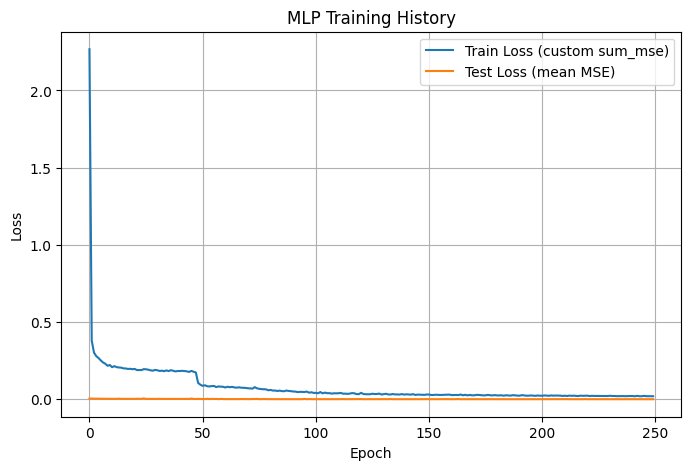

Final model saved as mlp_final_model.pt


In [44]:
# -------------------
# 5) Training Loop
# -------------------
best_loss = float('inf')
best_epoch = 0
epochs_no_improve = 0
lr_current = learning_rate
start_time = time.time()

train_losses, test_losses = [], []

for epoch in range(1, num_epochs + 1):
    # ---- Training ----
    model_mlp.train()
    running_loss = 0.0
    for batch_idx, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels   = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_mlp(features)
        loss = criterion_train(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)

        # Example step-based log every 100 steps
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Train Loss (batch): {loss.item():.4f}")

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # ---- Validation (Test) ----
    model_mlp.eval()
    test_loss = 0.0
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.to(device)
            labels   = labels.to(device)
            preds = model_mlp(features)
            # Standard MSELoss (mean over batch & output dims)
            test_loss += criterion_val(preds, labels).item() * features.size(0)
    epoch_test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    # Print epoch log
    print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {epoch_train_loss:.6f}, Test Loss: {epoch_test_loss:.6f}")

    # Early stopping check
    if epoch_test_loss < best_loss:
        best_loss = epoch_test_loss
        best_epoch = epoch
        epochs_no_improve = 0
        # Save best model weights
        torch.save(model_mlp.state_dict(), "mlp_best_model.pt")
        print(f"New best model at epoch {epoch}, test loss {best_loss:.6f}")
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"No improvement for {patience} epochs. Stopping early at epoch {epoch}.")
        break

    # Update LR each epoch
    lr_current *= learning_rate_decay
    update_lr(optimizer, lr_current)

elapsed = time.time() - start_time
print(f"\nTraining completed in {elapsed:.2f} seconds. Best epoch: {best_epoch} (Test Loss={best_loss:.6f})")

# -------------------
# 6) Plot & Save History
# -------------------
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss (custom sum_mse)")
plt.plot(test_losses, label="Test Loss (mean MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.title("MLP Training History")
plt.show()

# Save final model
torch.save(model_mlp.state_dict(), "mlp_final_model.pt")
print("Final model saved as mlp_final_model.pt")

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def inverse_scale_label_mlp(scaled_label, min_y, max_y, eps=1e-8):
    """
    Given a scaled label (e.g. in [0,1]), return the original value.
    Assumes: scaled = (val - min_y) / (max_y - min_y)
    so that: val = scaled * (max_y - min_y) + min_y.
    """
    return scaled_label * (max_y - min_y) + min_y

def plot_small_subset_predictions_mlp(model, dataset, device, y_min, y_max, sample_count=100, set_name="Train"):
    """
    Plots a subset of samples (default 100) showing predicted vs. true values for CL and CL/CD.
    
    For each sample from the dataset (which is a TensorDataset with
    - features of shape (flattened_dim,) e.g. (384,) corresponding to a reshaped airfoil of shape (2, 192)
    - labels of shape (2,) representing [CL, CL/CD] in scaled [0,1] range),
    
    the function:
      - Reshapes the flattened input to (2, n_points) for plotting;
      - Performs a forward pass with the model;
      - Inverse-scales both the ground-truth and the predicted labels.
      
    It then produces two line plots (one for CL and one for CL/CD) over the set of sampled indices.
    """
    model.eval()
    indices = np.random.choice(len(dataset), size=sample_count, replace=False)
    indices = sorted(indices)
    
    real_CL_vals = []
    real_ratio_vals = []
    pred_CL_vals = []
    pred_ratio_vals = []
    
    with torch.no_grad():
        for idx in indices:
            features, scaled_label = dataset[idx]
            # features is flattened; reshape to (2, n_points) (assuming original shape was (2,192))
            coords = features.reshape(2, -1)
            # For model prediction, add a batch dimension (features shape becomes (1, flattened_dim))
            features_batch = features.unsqueeze(0).to(device)
            pred_scaled = model(features_batch)  # (1,2)
            pred_scaled = pred_scaled.squeeze(0).cpu().numpy()  # (2,)
            # Convert ground-truth to numpy array
            scaled_label_np = scaled_label.numpy()
            
            true_unscaled = inverse_scale_label_mlp(scaled_label_np, y_min, y_max).flatten()
            pred_unscaled = inverse_scale_label_mlp(pred_scaled, y_min, y_max).flatten()
            
            real_CL_vals.append(true_unscaled[0])
            real_ratio_vals.append(true_unscaled[1])
            pred_CL_vals.append(pred_unscaled[0])
            pred_ratio_vals.append(pred_unscaled[1])
    
    x_axis = range(sample_count)
    plt.figure(figsize=(12, 8))
    
    # Top subplot: CL values
    plt.subplot(2, 1, 1)
    plt.plot(x_axis, real_CL_vals, 'o-', label="True CL", color='blue', alpha=0.7)
    plt.plot(x_axis, pred_CL_vals, 's--', label="Predicted CL", color='red', alpha=0.7)
    plt.title(f"{set_name} Set: CL on {sample_count} Samples")
    plt.xlabel("Sample Index")
    plt.ylabel("CL (real scale)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    # Bottom subplot: CL/CD ratio values
    plt.subplot(2, 1, 2)
    plt.plot(x_axis, real_ratio_vals, 'o-', label="True Ratio", color='blue', alpha=0.7)
    plt.plot(x_axis, pred_ratio_vals, 's--', label="Predicted Ratio", color='red', alpha=0.7)
    plt.title(f"{set_name} Set: CL/CD Ratio on {sample_count} Samples")
    plt.xlabel("Sample Index")
    plt.ylabel("CL/CD Ratio (real scale)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()

def visualize_predictions_grid_mlp(model, dataset, device, y_min, y_max, sample_indices=None, set_name="Train", figsize=(20,8)):
    """
    Visualizes a grid of predictions for a set of airfoil samples.
    
    For each sample:
      - The input features (a flattened airfoil) are reshaped back to (2, n_points) for plotting,
      - The model produces its prediction (a 2-element vector for CL and CL/CD),
      - Both the scaled label and the prediction are inverse-scaled.
    
    Two rows are displayed:
      - The top row shows the airfoil shape annotated with the true and predicted CL values.
      - The bottom row shows the same for the true and predicted CL/CD ratio values.
    """
    model.eval()
    if sample_indices is None:
        num_samples = 5
        sample_indices = np.random.choice(len(dataset), size=num_samples, replace=False)
    else:
        num_samples = len(sample_indices)
    
    fig, axs = plt.subplots(2, num_samples, figsize=figsize)

    for j, idx in enumerate(sample_indices):
        features, label = dataset[idx]
        # Reshape flattened features back to (2, n_points); assume n_points=192 (adjust if different)
        coords = features.reshape(2, -1)
        coords_np = coords.cpu().numpy() if features.is_cuda else coords.numpy()

        # Get prediction
        features_batch = features.unsqueeze(0).to(device)
        with torch.no_grad():
            pred = model(features_batch)
        pred = pred.squeeze(0).cpu()  # shape: (2,)

        true_unscaled = inverse_scale_label_mlp(label.numpy(), y_min, y_max).flatten()
        pred_unscaled = inverse_scale_label_mlp(pred.numpy(), y_min, y_max).flatten()

        # For reporting, also show the scaled values
        true_CL_scaled = label[0].item()
        pred_CL_scaled = pred[0].item()
        true_ratio_scaled = label[1].item()
        pred_ratio_scaled = pred[1].item()

        true_CL_real = true_unscaled[0]
        pred_CL_real = pred_unscaled[0]
        true_ratio_real = true_unscaled[1]
        pred_ratio_real = pred_unscaled[1]

        # --- Top Row: CL Values ---
        axs[0, j].plot(coords_np[0], coords_np[1], 'b-', linewidth=2)
        axs[0, j].set_title(
            f"Sample {idx}\n"
            f"CL (scaled): True {true_CL_scaled:.3f}, Pred {pred_CL_scaled:.3f}\n"
            f"CL (real): True {true_CL_real:.3f}, Pred {pred_CL_real:.3f}"
        )
        axs[0, j].set_xlabel("X")
        axs[0, j].set_ylabel("Y")
        axs[0, j].set_aspect('equal', adjustable='box')
        axs[0, j].grid(True, linestyle="--", alpha=0.6)

        # --- Bottom Row: CL/CD Ratio Values ---
        axs[1, j].plot(coords_np[0], coords_np[1], 'b-', linewidth=2)
        axs[1, j].set_title(
            f"Sample {idx}\n"
            f"Ratio (scaled): True {true_ratio_scaled:.3f}, Pred {pred_ratio_scaled:.3f}\n"
            f"Ratio (real): True {true_ratio_real:.3f}, Pred {pred_ratio_real:.3f}"
        )
        axs[1, j].set_xlabel("X")
        axs[1, j].set_ylabel("Y")
        axs[1, j].set_aspect('equal', adjustable='box')
        axs[1, j].grid(True, linestyle="--", alpha=0.6)

    plt.suptitle(f"{set_name} Set Predictions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Visualizing predictions on TRAIN set samples:


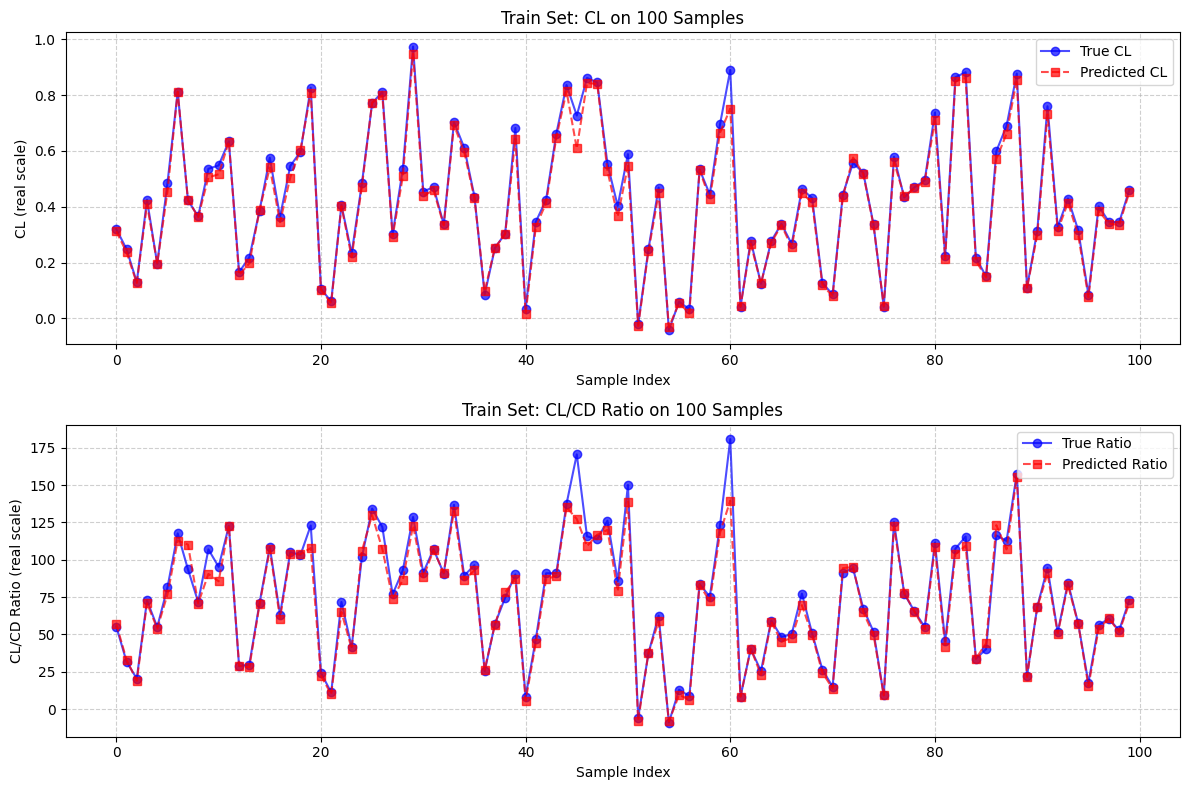

Visualizing predictions on TEST set samples:


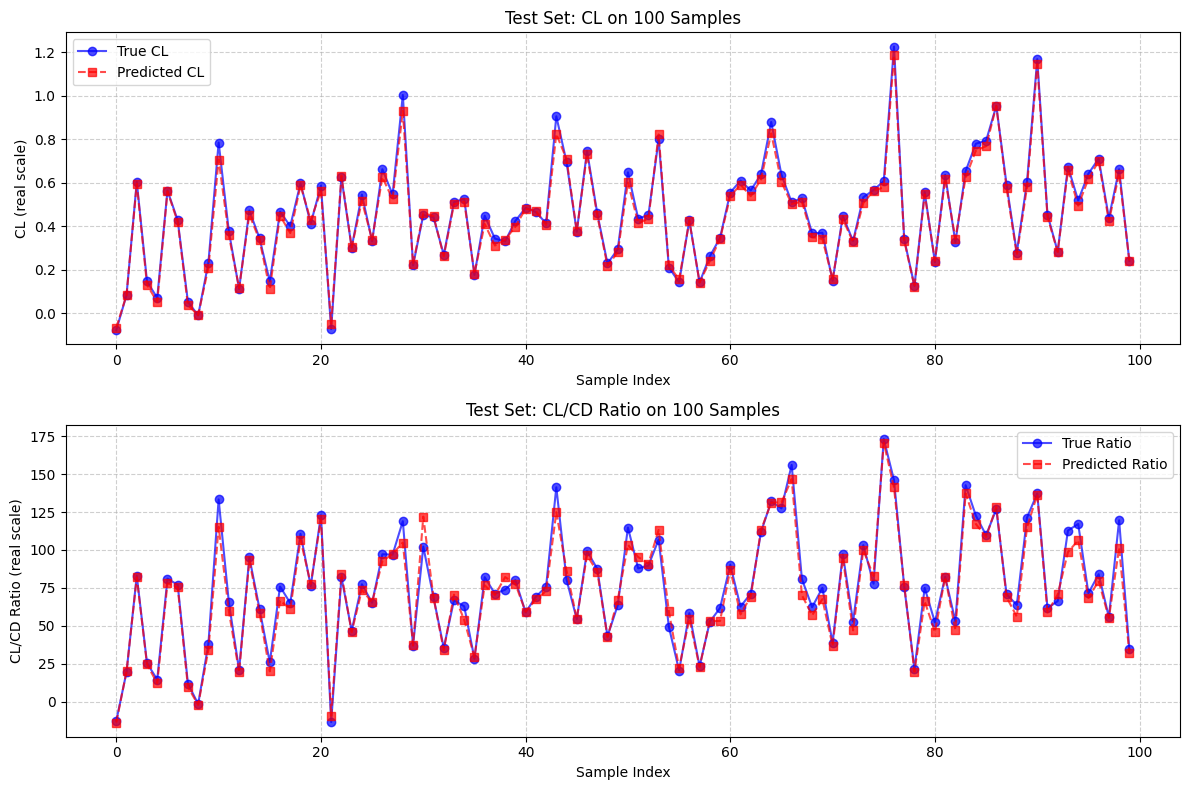

Visualizing a grid of predictions on the TRAIN set:


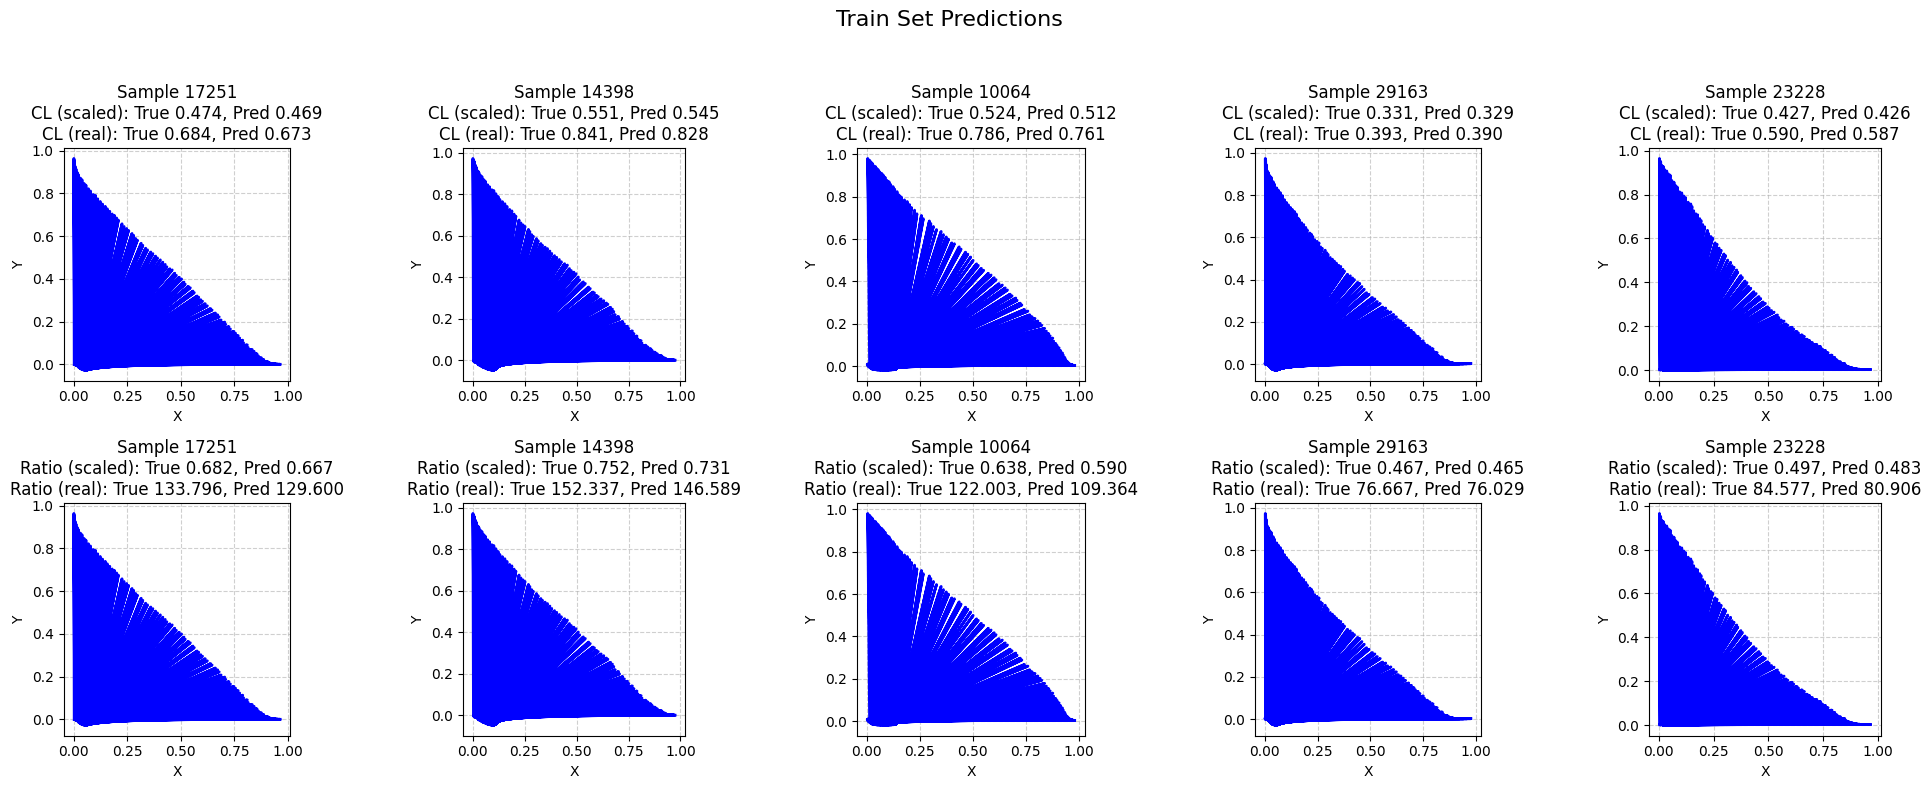

In [47]:
# Assume your MLP model (model_mlp) has been trained,
# and your TensorDataset is called "train_dataset" or "test_dataset".
# Also assume you have loaded y_min and y_max, for example:
y_min = np.load("/kaggle/working/data/y_min.npy")  # shape: (1,2)
y_max = np.load("/kaggle/working/data/y_max.npy")  # shape: (1,2)

print("Visualizing predictions on TRAIN set samples:")
plot_small_subset_predictions_mlp(model_mlp, train_dataset, device, y_min, y_max, sample_count=100, set_name="Train")

print("Visualizing predictions on TEST set samples:")
plot_small_subset_predictions_mlp(model_mlp, test_dataset, device, y_min, y_max, sample_count=100, set_name="Test")

print("Visualizing a grid of predictions on the TRAIN set:")
visualize_predictions_grid_mlp(model_mlp, train_dataset, device, y_min, y_max, set_name="Train")
